In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_parquet('data/Syn-training.parquet')
df = pd.concat([df, pd.read_parquet('data/DNS-testing.parquet')])
df = pd.concat([df, pd.read_parquet('data/UDP-testing.parquet')])
df['Label'].value_counts()

Label
Syn          43302
Benign       32110
DrDoS_UDP    10420
DrDoS_DNS     3669
Name: count, dtype: int64

In [9]:
# perform a QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Label', axis=1), df['Label'], test_size=0.30, random_state=101)

# Create a QDA object
qda = QuadraticDiscriminantAnalysis()

# Fit the model to the data
qda.fit(X_train, y_train)

# Make predictions
predictions = qda.predict(X_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

c:\Users\benha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.9841719116606458


In [10]:
# plot classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99      9609
   DrDoS_DNS       0.96      0.77      0.85      1124
   DrDoS_UDP       0.92      0.99      0.95      3127
         Syn       1.00      0.99      1.00     12991

    accuracy                           0.98     26851
   macro avg       0.97      0.94      0.95     26851
weighted avg       0.98      0.98      0.98     26851



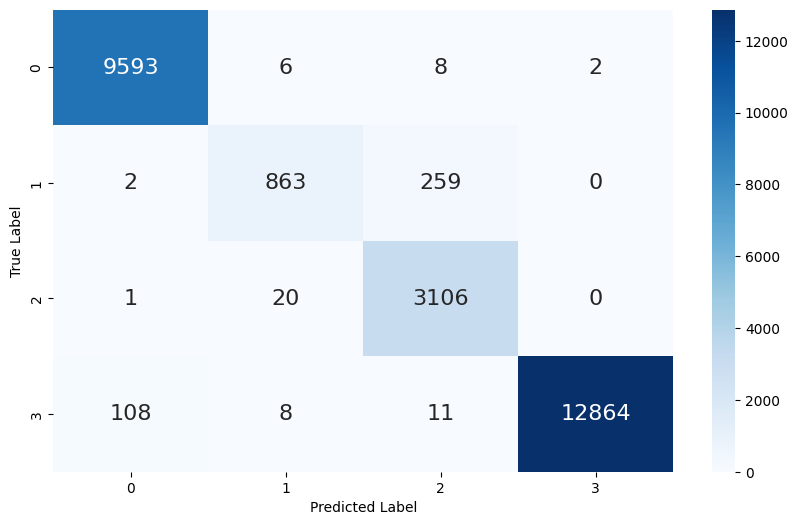

In [11]:
# plot the confusion matrix heatmap
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()